# Food Delivery App Customers Analysis: GrabSpark 2022 Case Competition
    Data-driven business case competition
---
##### <u><b>Objective</b> : To find meaningful insights from given datasets and to indicate problems from the data.</u><br>

*by Patcharanat P.*<br>

**Dataset : Given by Grab company**<br>

attributes - providing attibutes of the data
* 'sample_a.csv'<br>

metrics - providing metrics of the data
* 'sample_m.csv'<br>

### Background
    Grab, one of the biggest company in food delivery industry, created an business case competition event for the purpose of solving own company problems by giving candidates sample datasets which is already normalized to prevent data oversharing to find insights and problems from it, and also giving 'case booklet' for the current contexts and further details of the company. So, objective of this project are analyzing given datasets and pointing out what should be concern for developing further business strategy.

### Table of contents
* Import Library
* Data Preparing
* Data Understanding
* Exploratory Data Analysis
* Insights Summary
* Interpretation and Actions for Business use cases

---

### Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('dark')

---

### Data Preparing

In [3]:
df_a = pd.read_csv('sample_a.csv')
df_m = pd.read_csv('sample_m.csv')

# the column is not useful.
df_a.drop(columns=['predicted age 10year'], inplace=True)

# Extract only month for 'month' column and replace
df_m['month'] = df_m['month'].str.split('-')
for index, row in df_m.iterrows() :
    df_m['month'][index] = row['month'][1]
df_m['month']

C:\Users\HP\AppData\Local\Temp\ipykernel_15620\2477196333.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['month'][index] = row['month'][1]


0        Apr
1        May
2        Jun
3        Apr
4        May
        ... 
15933    Jun
15934    May
15935    May
15936    May
15937    May
Name: month, Length: 15938, dtype: object

In [4]:
df_a.head()

,passenger_id,city,operating_system,GU subscription month,first vertical,predicted gender
0,6MU770IJ316,B,Android,NaN,Transport,Male
1,1LK210OW862,A,Android,NaN,GrabFood,Male
2,2GO467RR778,D,Android,NaN,GrabFood,Female
3,8YN162JM713,F,Android,NaN,GrabFood,Male
4,3VV906PF234,F,Android,Feb-22,GrabFood,Male


In [5]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20122 entries, 0 to 20121
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   passenger_id           20122 non-null  object
 1   city                   20122 non-null  object
 2   operating_system       20122 non-null  object
 3   GU subscription month  497 non-null    object
 4   first vertical         20122 non-null  object
 5   predicted gender       20044 non-null  object
dtypes: object(6)
memory usage: 943.3+ KB


In [6]:
df_m.head()

,passenger_id,month,gmv,tpv,booking,cashless_bookings,grabfood_gmv,grabfood_tpv,grabfood_booking,grabfood_promo,...,transport_booking,transport_promo,grabexpress_gmv,grabexpress_tpv,grabexpress_booking,grabexpress_promo,earned_point_l30d,burned_point_l30d,eom_point_balance,eom_reward_tier
0,6DY932XX001,Apr,228.87,228.87,22,22,190.20,190.20,18,75.00,...,4,9.85,0.0,0.0,0,0.0,20,20,20,platinum
1,6DY932XX001,May,361.69,361.69,20,20,195.15,195.15,15,85.00,...,1,2.15,0.0,0.0,0,0.0,60,80,20,platinum
2,6DY932XX001,Jun,537.62,537.62,49,49,383.45,383.45,43,122.25,...,5,3.13,0.0,0.0,0,0.0,60,60,20,platinum
3,7TI041UN191,Apr,45.15,45.15,2,2,45.15,45.15,2,2.50,...,0,0.00,0.0,0.0,0,0.0,20,0,40,gold
4,7TI041UN191,May,74.70,74.70,7,7,74.70,74.70,7,6.25,...,0,0.00,0.0,0.0,0,0.0,20,40,20,gold


In [7]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15938 entries, 0 to 15937
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   passenger_id         15938 non-null  object 
 1   month                15938 non-null  object 
 2   gmv                  15938 non-null  float64
 3   tpv                  15938 non-null  float64
 4   booking              15938 non-null  int64  
 5   cashless_bookings    15938 non-null  int64  
 6   grabfood_gmv         15938 non-null  float64
 7   grabfood_tpv         15938 non-null  float64
 8   grabfood_booking     15938 non-null  int64  
 9   grabfood_promo       15938 non-null  float64
 10  grabmart_gmv         15938 non-null  float64
 11  grabmart_tpv         15938 non-null  float64
 12  grabmart_booking     15938 non-null  int64  
 13  grabmart_promo       15938 non-null  float64
 14  transport_gmv        15938 non-null  float64
 15  transport_tpv        15938 non-null 

    Since the datasets are collected correctly and purposely, so the data is quite already cleaned and ready to be analyzed. 

---

### Data Understanding

    Data understanding is one of the biggest processes of this work. Although Grab company gave definition for each column, It still consume a large amount of time to understand relationship between the tables, within the table, with the given context and also with the algorithm of Grab Delivery app. So, this section will give definition of important columns which is involved in data analysis process for easier explanation in further.

The data include with 2 tables:
* **sample_a - 6 columns** as 'df_a'
    * **passenger_id**: *Unique for each passenger*
    * **city: City where** *the passenger was active in (A-H)*
    * **operating_system**: *Passenger's device operating system (not available to all passengers)*
    * **GU subscription month**: *the month that the passenger started GrabUnlimited subscription*
    * **first vertical**: *The vertical service that passenger first used*
    * **predicted gender**: *Predicted gender of the passenger (not available to all passengers)*
* **sample_m - 26 columns** as 'df_m'
    * **passenger_id**: *Unique ID of the passenger*
    * **month**: *Month of the aggregated metrics*
    * **gmv**: *Gross Merchandise value - **Total spending amount** in THB excluding any discount* 
    * **tpv**: *Totol processed value (TPV) - **Total cashless spending amount** in THB excluding any discount*
    * **booking**: *Total number of booking*
    * **cashless_bookings**: *Total number of cashless booking*
    * **grabfood_gmv**: *GrabFood GMV*
    * **grabfood_tpv**: *GrabFood TPV*
    * **grabfood_booking**: *GrabFood Booking*
    * **grabfood_promo**: *Total amount of promo used in THB on GrabFood bookings<br> 
    etc. for grabmart, transport (grab transport), grabexpress*
    * **earned_point_l30d**: *Total number of GrabRewards point earned*
    * **burned_point_l3od**: *Total number of GrabRewards point burned*
    * **eom_point_balance**: *Total GrabRewards point balance at end of month*
    * **eom_reward_tier**: *Current tier for each customer for specific month*

---

### Exploratory Data Analysis

##### **Understanding Relationship between the tables before Analysis**

In [8]:
print(
    df_a['passenger_id'].shape,
    df_m['passenger_id'].shape
)

(20122,) (15938,)


In [9]:
print(
    df_a['passenger_id'].unique().shape,
    df_m['passenger_id'].unique().shape
)


(20122,) (7864,)


    After inspecting number of rows, the first thing you can notice is each row in table 'df_a' containing an unique customer by unique passenger id, unlike table 'df_m', which contains transaction per user for each month for customers, so it means 'df_m' containing duplicate passenger_id. the second, number of unique customers in 'df_m' not equals to customers in 'df_a'. why is that?

> From data description, each row in 'df_m' represents aggregated metrics for each passenger in each month in Q2 2022.<br>
And if the passenger was not active in a month (having no transaction on the platform) then there will be no data.

In [10]:
df_m['month'].unique()

array(['Apr', 'May', 'Jun'], dtype=object)

    So, you can assume that all customers are recorded in 'df_a', and only active users who spent money in May, April, and June are showed in 'df_m'. Hence I managed customers into 2 groups; active users, and inactive users. My intention now is to find difference of customer behavior between 2 groups, so I can create strategy which can attract inactive user to become an active users and re-purchase with Grab App again.

In [11]:
active_customer_id = df_m['passenger_id'].unique() # collect unique id of active customers
active_customer_condition = df_a['passenger_id'].isin(active_customer_id) # Boolean Series to track active customers in df_a

# seperate active customers, and inactive customers in df_a
active_customer = df_a[active_customer_condition]
inactive_customer = df_a[~active_customer_condition]

    Now you can analyze customer behavior for each group in df_a.

In [12]:
active = round((df_m['passenger_id'].unique().shape[0] / df_a['passenger_id'].unique().shape[0])*100, 3)
inactive = 100 - round((df_m['passenger_id'].unique().shape[0] / df_a['passenger_id'].unique().shape[0])*100, 3)

print('Active users: ', active, ' %')
print('Inactive users: ', inactive, ' %')

Active users:  39.082  %
Inactive users:  60.918  %


    Additionally, you can calculate percent of active users, and inactive users by counting unique passenger ID.

##### **For Analysis** 

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

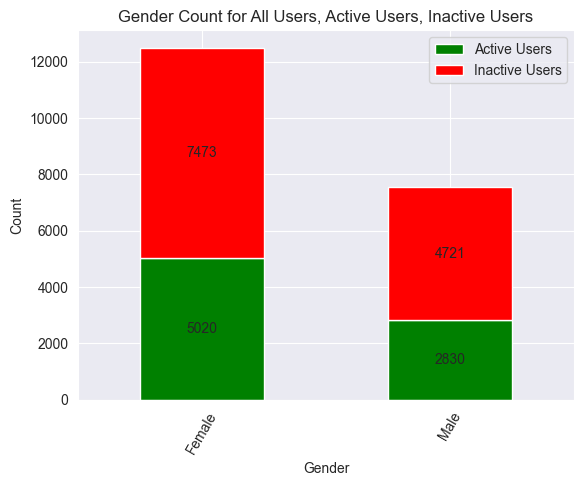

In [13]:
x = df_a['predicted gender'].value_counts().index.tolist()
y1 = active_customer['predicted gender'].value_counts().values.tolist()
y2 = inactive_customer['predicted gender'].value_counts().values.tolist()

df_temp = pd.DataFrame(data={'Active Users': y1, 'Inactive Users': y2})
df_temp.index = x

ax = df_temp.plot(kind='bar', stacked=True, xlabel='Gender', ylabel='Count', color={'Active Users': 'green','Inactive Users': 'red'})
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels

plt.grid(True)
plt.title('Gender Count for All Users, Active Users, Inactive Users')
plt.xticks(rotation=60)

In [122]:
print('Female customer active ratio: ', round(5020/7473, 3))
print('Male customer active ratio: ', round(2830/4721, 3))
print('Female customer and Male customer ratio: ', round((5020+7473)/(2830+4721), 3))

Female customer active ratio:  0.672
Male customer active ratio:  0.599
Female customer and Male customer ratio:  1.654


Text(0.5, 0, 'Gender')

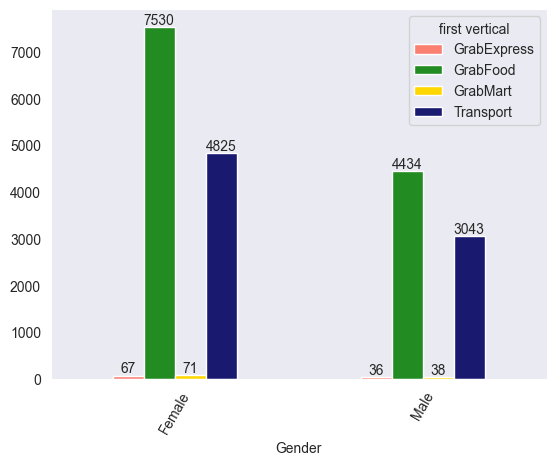

In [15]:
ax = df_a.groupby('predicted gender')['first vertical'].value_counts().unstack().plot(kind='bar', color= ['salmon', 'forestgreen', 'gold', 'midnightblue'])
for container in ax.containers :
    ax.bar_label(container)

plt.xticks(rotation=60)
plt.xlabel('Gender')

    From the charts, you can see that female has more potential to be a customer than male implying that female have a larger marketshare for all services including food delivery, transportation, package express, and mart service. Moreover, female is more likely to be more loyal customer because of higher active users and inactive users ratio comparing.
    And GrabFood and GrabTransport are the most attractive for new users comparing to the others.

---

    Comparing first-used services between active users, and inactive users.

Text(0.5, 1.0, 'Active customers First-use Feature Counting')

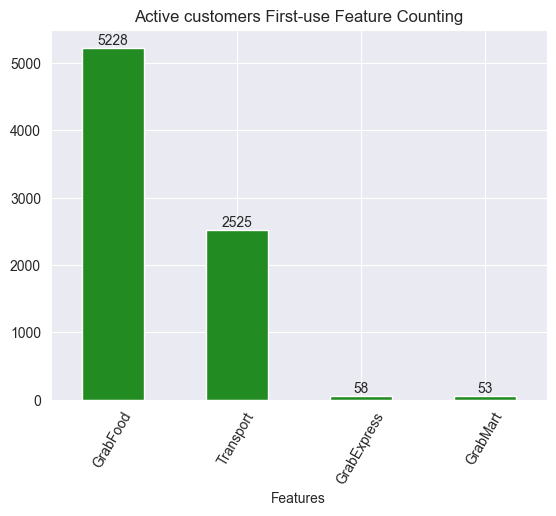

In [16]:
ax = active_customer['first vertical'].value_counts().plot(kind='bar', color='forestgreen')

ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)
plt.grid(True)

plt.xlabel('Features')
plt.title('Active customers First-use Feature Counting')

Text(0.5, 1.0, 'Inactive customers First-use Feature Counting')

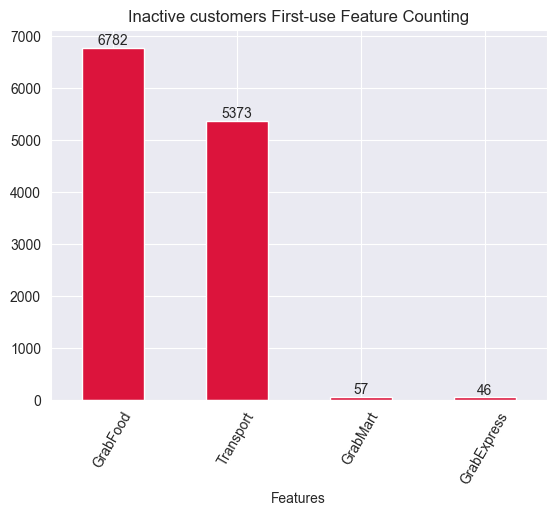

In [17]:
ax = inactive_customer['first vertical'].value_counts().plot(kind='bar', color='crimson')

ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)
plt.grid(True)

plt.xlabel('Features')
plt.title('Inactive customers First-use Feature Counting')

In [18]:
print('First Service: GrabFood')
transport_user_ID = df_a.loc[df_a['first vertical'] == 'GrabFood']['passenger_id']
condition = df_m['passenger_id'].isin(transport_user_ID)
df_m[condition][['grabfood_gmv', 'grabfood_tpv', 'grabmart_gmv', 'grabmart_tpv', 'transport_gmv', 'transport_tpv', 'grabexpress_gmv', 'grabexpress_tpv']].mean()

First Service: GrabFood


grabfood_gmv       48.887829
grabfood_tpv       19.292891
grabmart_gmv        4.877232
grabmart_tpv        1.874119
transport_gmv       2.239865
transport_tpv       0.710461
grabexpress_gmv     1.850848
grabexpress_tpv     0.520431
dtype: float64

In [19]:
print('First Service: Transport')
grabfood_user_ID = df_a.loc[df_a['first vertical'] == 'Transport']['passenger_id']
condition = df_m['passenger_id'].isin(grabfood_user_ID)
df_m[condition][['grabfood_gmv', 'grabfood_tpv', 'grabmart_gmv', 'grabmart_tpv', 'transport_gmv', 'transport_tpv', 'grabexpress_gmv', 'grabexpress_tpv']].mean()

First Service: Transport


grabfood_gmv       61.094038
grabfood_tpv       40.110053
grabmart_gmv        6.330161
grabmart_tpv        3.803649
transport_gmv       8.337419
transport_tpv       3.878391
grabexpress_gmv     5.400791
grabexpress_tpv     2.378652
dtype: float64

    For inactive users, you definitely can't find any customer behavior insight because Grab didn't provide enough data to analyze, so you have to focus on active users instead, but one thing that can be obviously noticed is a lots of customer who used GrabTransport as first-service having potential enough to be a customer, but failing to re-purchase. Besides, the customers have spent for GrabFood even more than customers who use GrabFood as a first service.

In [20]:
df_a.loc[df_a['first vertical'] == 'GrabFood']['city'].value_counts()

A    2832
G    2329
C    2054
D    1946
B    1206
E     682
F     667
H     294
Name: city, dtype: int64

In [21]:
df_a.loc[df_a['first vertical'] == 'Transport']['city'].value_counts()

A    4950
C    1044
D     803
G     473
B     418
E     113
F      85
H      12
Name: city, dtype: int64

    For customers who're still active, After checking spending behavior of GrabFood first-used customer, and GrabTransport first-used customer, you can surprisingly see that GrabTransport first-used customer averagely spent more than the other group. So my assumption is most of GrabTransport first-used customer lived in city A which may be a capital, so people quite have potential to spend money and demand for transportation service, because of this, it causes a large marketshare, have more chance of willing to use other service of Grab besides GrabFood and GrabTransport, mostly spent by **TPV** assuming that this group of customer should be highly demanded by Grab company, which will has supported insights later in this notebook. Moreover, Maybe if Grab can make this customer group (who used GrabTransport as a first service) re-active again, Grab will earn a large amount of spending from GrabFood by this group of customers.

    The most importances which will be referred later are GrabTransport first-used users mostly spent money as TPV; spent by cashless method comparing to the other group. And inactive users who use GrabTransport as a first service have potential to be a GrabTransport customer, but decide not to purchase with Grab and maybe use competitior's service or public transport instead.

---

    Comparing first-used services between cities.

Text(0.5, 1.0, 'Comparing First Vertical each City (Inactive Customers)')

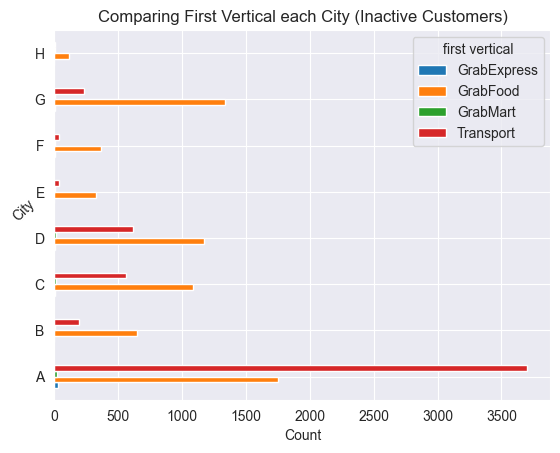

In [22]:
inactive_customer.groupby('first vertical')['city'].value_counts().unstack(0).plot(kind='barh')

plt.grid(True)

plt.xlabel('Count')
plt.ylabel('City', rotation=45)
plt.title('Comparing First Vertical each City (Inactive Customers)')

Text(0.5, 1.0, 'Comparing First Vertical each City (Active Customers)')

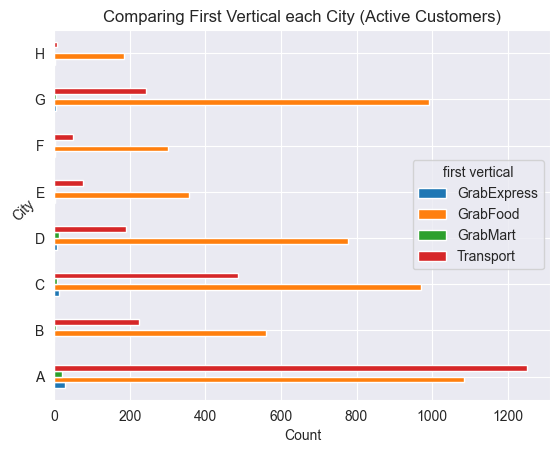

In [23]:
active_customer.groupby('first vertical')['city'].value_counts().unstack(0).plot(kind='barh')

plt.grid(True)

plt.xlabel('Count')
plt.ylabel('City', rotation=45)
plt.title('Comparing First Vertical each City (Active Customers)')

Text(0.5, 1.0, 'Comparing First Vertical each City (All)')

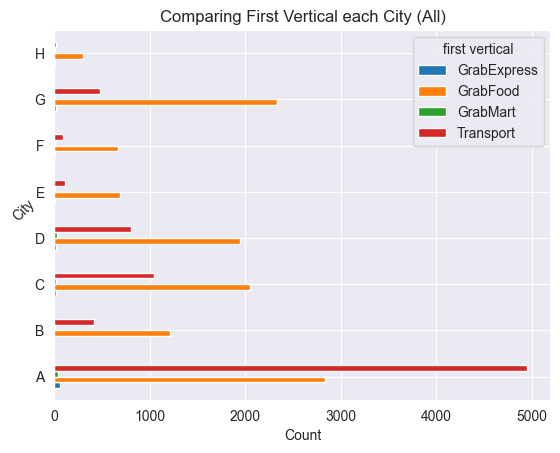

In [24]:
df_a.groupby('first vertical')['city'].value_counts().unstack(0).plot(kind='barh')

plt.grid(True)

plt.xlabel('Count')
plt.ylabel('City', rotation=45)
plt.title('Comparing First Vertical each City (All)')

    Proving that city A literally has a larger marketshare for GrabTransport but not occupied by Grab company.

---

    About GU (GrabUnlimited) subscription

In [56]:
print('Total GU Users: ', df_a['GU subscription month'].notnull().sum())
print('Active Users who have GU Subscription: ', active_customer['GU subscription month'].notnull().sum())
print('Inactive Users who have GU Subscription: ', inactive_customer['GU subscription month'].notnull().sum())

Total GU Users:  497
Active Users who have GU Subscription:  488
Inactive Users who have GU Subscription:  9


<AxesSubplot:>

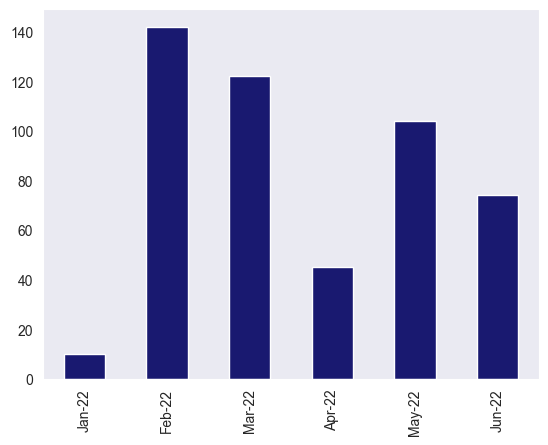

In [ ]:
df_a['GU subscription month'].value_counts().reindex(['Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22']).plot(kind='bar', color='midnightblue')

    Doesn't matter which month customers started the subscription, almost entire of GU Customers still active on Grab App. And somehow, GU subscription got attention increased significantly during Feb, and May. I assume it was time that Grab promoted GU campaign. But overall, GU Subscription is getting lesser and lesser attention.  

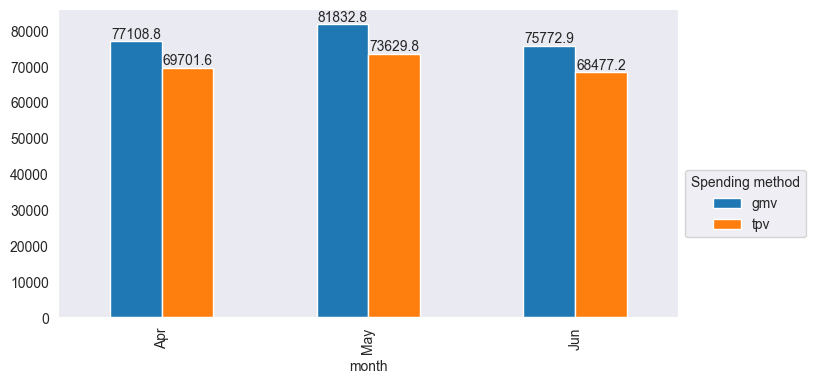

In [92]:
c1 = active_customer['GU subscription month'].notnull() # Boolean of customers who have GU subscription
c2 = active_customer[c1]['passenger_id'].unique() # Get unique IDs of active GU customers
c3 = df_m['passenger_id'].isin(c2) # mapping to data df_m to df_a -> Boolean Series of spending behavior of active GU customers
ax = df_m[c3].groupby('month')[['gmv', 'tpv']].sum().reindex(['Apr', 'May', 'Jun']).plot(kind='bar', figsize=(8, 4))

for container in ax.containers : 
    ax.bar_label(container)
    
plt.legend(title='Spending method', bbox_to_anchor=(1.0, 0.5))

    Almost entire of active GU customers transactions are spent by cashless.

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

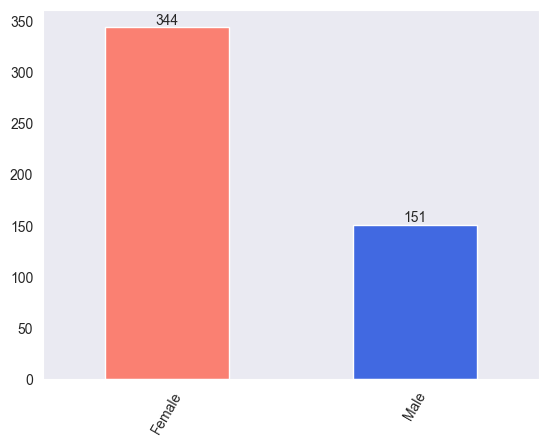

In [58]:
GU_condition = df_a['GU subscription month'].notnull()
GU_user = df_a[GU_condition]
ax = GU_user['predicted gender'].value_counts().plot(kind='bar', color=['salmon', 'royalblue'])

ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)

    Earlier, There's female customer, and male customer on Grab App ratio around 1.65, but for GU subscriber is more than 2.2. Implying that female customer significantly coresponded to Promotion, Discount, etc.

Text(0.5, 1.0, 'Users Having GrabUnlimited Subscription')

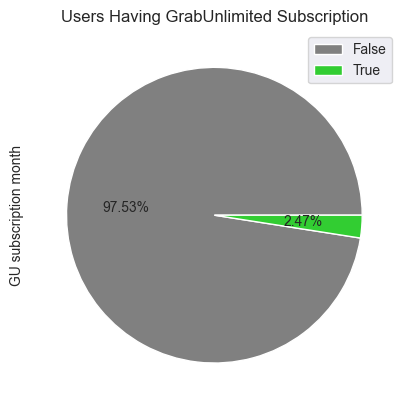

In [28]:
df_a['GU subscription month'].notnull().value_counts().plot(kind='pie', autopct='%.2f%%', labels=None, legend=True, colors=['gray', 'limegreen'])
plt.title('Users Having GrabUnlimited Subscription')

    You can see that customer who applied GU subscription are exceptionally loyal to Grab, but still, very few users on Grab App applied GU subscription. This should be more taken seriously to make Grab customer be more loyal to Grab.

---

    Comparing number of users between cities

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H')])

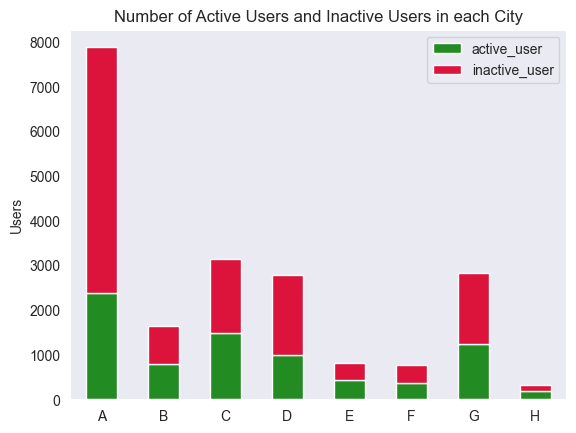

In [119]:
# ax1 = inactive_customer['city'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']).plot(kind='bar', color='darkred', alpha=0.7)
ax1 = active_customer['city'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']).tolist()
# ax2 = active_customer['city'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']).plot(kind='bar', color='forestgreen', bottom=ax1)
ax2 = inactive_customer['city'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']).tolist()
df_temp = pd.DataFrame({'active_user': ax1, 'inactive_user': ax2}, index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

df_temp.plot(kind='bar', stacked=True, color={'active_user': 'forestgreen', 'inactive_user': 'crimson'})
plt.title('Number of Active Users and Inactive Users in each City')
plt.ylabel('Users')
plt.xticks(rotation='horizontal')

    Number of inactive users show opportunity for Grab to capture. And number of active users is like points of Grab that have to be maintain.

---

    IOS VS Android

(array([0, 1]), [Text(0, 0, 'Android'), Text(1, 0, 'iOS')])

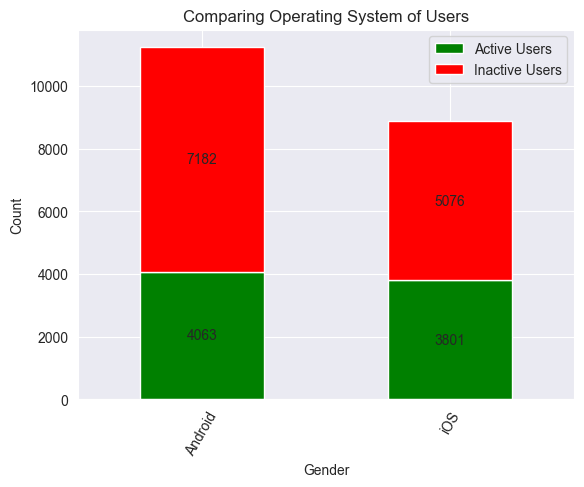

In [32]:
x = df_a['operating_system'].value_counts().index.tolist()
y1 = active_customer['operating_system'].value_counts().values.tolist()
y2 = inactive_customer['operating_system'].value_counts().values.tolist()

df_temp = pd.DataFrame(data={'Active Users': y1, 'Inactive Users': y2})
df_temp.index = x

ax = df_temp.plot(kind='bar', stacked=True, xlabel='Gender', ylabel='Count', color={'Active Users': 'green','Inactive Users': 'red'})
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels

plt.grid(True)
plt.title('Comparing Operating System of Users')
plt.xticks(rotation=60)

In [121]:
user_android = df_a.loc[df_a['operating_system'] == 'Android']
user_ios = df_a.loc[df_a['operating_system'] == 'iOS']

df_a_operating_system_android = df_m[df_m['passenger_id'].isin(user_android['passenger_id'])]
df_a_operating_system_ios = df_m[df_m['passenger_id'].isin(user_ios['passenger_id'])]

print('average Android users spending: ', df_a_operating_system_android['gmv'].mean().round(3))
print('average IOS users spending: ', df_a_operating_system_ios['gmv'].mean().round(3))

average Android users spending:  55.727
average IOS users spending:  75.215


    According to the chart, there's more Android users than IOS users, but somehow, both group have approximately equal active rate, and also IOS users averagely spent more than Android users. This gives you some insights, but not utilizable for creating strategy.

---

    Comparing spending amount between services

(array([0, 1, 2]), [Text(0, 0, 'Apr'), Text(1, 0, 'Jun'), Text(2, 0, 'May')])

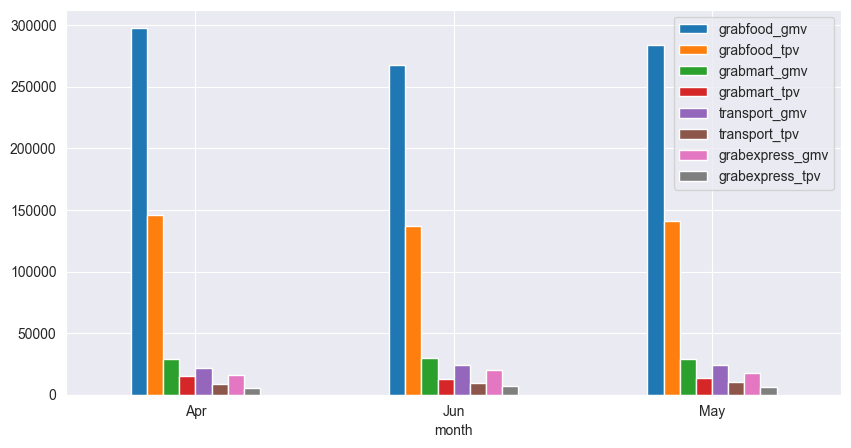

In [124]:
df_sample = df_m.groupby('month').sum()
df_sample = df_sample[['grabfood_gmv', 'grabfood_tpv', 'grabmart_gmv', 'grabmart_tpv', 'transport_gmv', 'transport_tpv', 'grabexpress_gmv', 'grabexpress_tpv']]

ax = df_sample.plot(kind='bar', legend='best', figsize=(10, 5))
plt.grid(True)
plt.xticks(rotation='horizontal')

In [128]:
df_sample[['grabmart_gmv', 'transport_gmv']].mean()

grabmart_gmv     29277.630000
transport_gmv    23229.253333
dtype: float64

(array([0, 1, 2]), [Text(0, 0, 'Apr'), Text(1, 0, 'May'), Text(2, 0, 'Jun')])

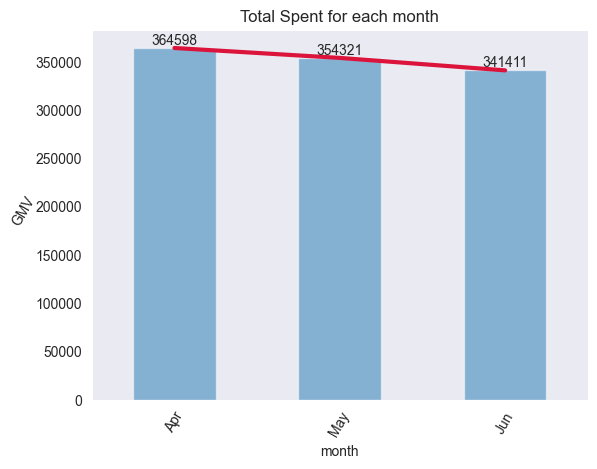

In [35]:
ax = df_m.groupby('month')['gmv'].sum().reindex(['Apr', 'May', 'Jun']).plot(kind='bar', alpha=0.5)
df_m.groupby('month')['gmv'].sum().reindex(['Apr', 'May', 'Jun']).plot(color='crimson', linewidth=3)

ax.bar_label(ax.containers[0])
plt.title('Total Spent for each month')
plt.ylabel('GMV', rotation=60)
plt.xticks(rotation=60)

[Text(0, 0, '5378'), Text(0, 0, '5473'), Text(0, 0, '5087')]

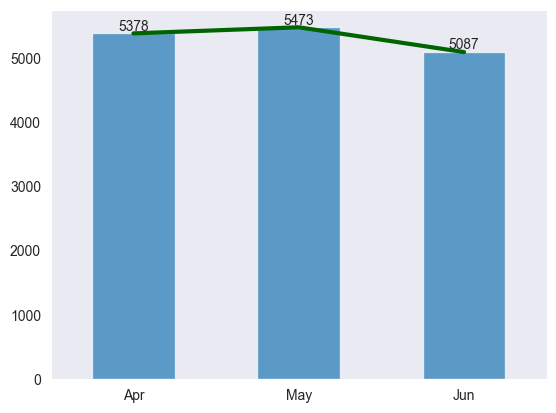

In [36]:
ax = df_m['month'].value_counts().reindex(['Apr', 'May', 'Jun']).plot(kind='bar', alpha = 0.7)
df_m['month'].value_counts().reindex(['Apr', 'May', 'Jun']).plot(color='darkgreen', linewidth=3)

ax.bar_label(ax.containers[0])

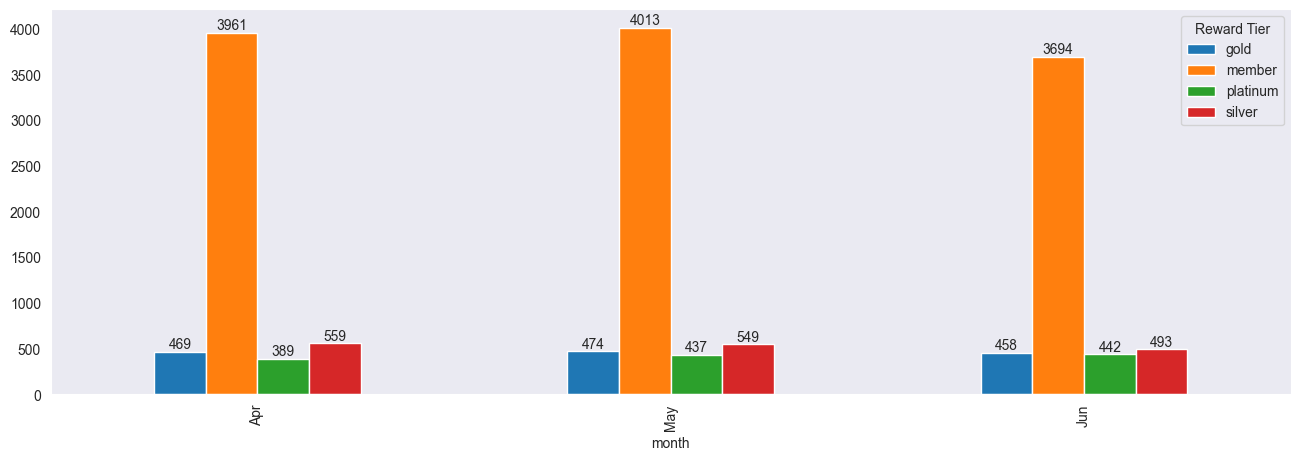

In [37]:
ax = df_m.groupby('month')['eom_reward_tier'].value_counts().unstack().reindex(['Apr', 'May', 'Jun']).plot(kind='bar', figsize=(16,5))

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels)

# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels

plt.legend(title='Reward Tier')

In [38]:
df_m['sum_promo'] = df_m['grabfood_promo'] + df_m['grabmart_promo'] + df_m['transport_promo'] + df_m['grabexpress_promo']

<AxesSubplot:>

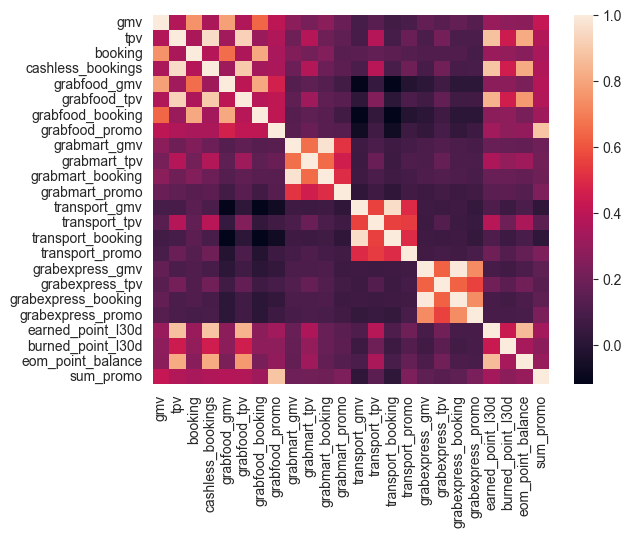

In [39]:
sns.heatmap(data=df_m.corr(method='kendall'))

    Ticket Size

In [40]:
error_index = df_m.loc[df_m['booking'] == 0].index
error = df_m.index.isin(error_index)

In [41]:
df_m['ticket_size'] = df_m['gmv'] / df_m['booking']
df_m[~error]['ticket_size'].mean()
# df_m.loc[df_m['eom_reward_tier'] == 'member']['ticket_size']

9.20526087290288

<AxesSubplot:xlabel='booking', ylabel='ticket_size'>

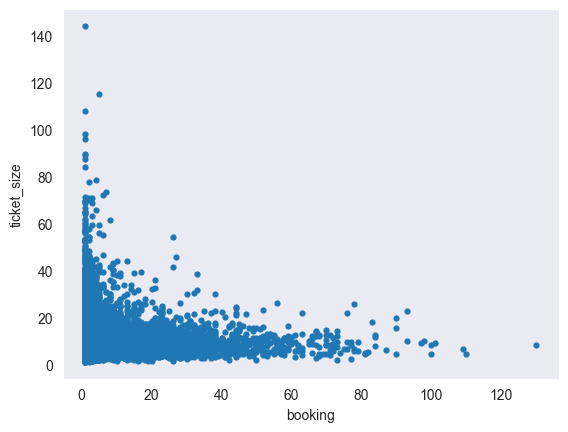

In [42]:
df_m[~error].plot(kind='scatter', x='booking', y='ticket_size', linewidth=0.01)

[Text(0, 0, '3.39761'),
 Text(0, 0, '7.99528'),
 Text(0, 0, '15.2003'),
 Text(0, 0, '37.0974')]

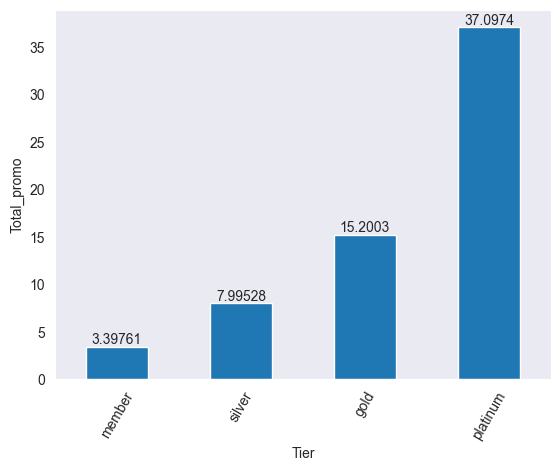

In [43]:
ax = df_m.groupby('eom_reward_tier')['sum_promo'].mean().sort_values().plot(kind='bar')

plt.xticks(rotation=60)
plt.xlabel('Tier')
plt.ylabel('Total_promo')

ax.bar_label(ax.containers[0])

[Text(0, 0, '0.0181785'),
 Text(0, 0, '0.0579336'),
 Text(0, 0, '0.0750436'),
 Text(0, 0, '0.276523')]

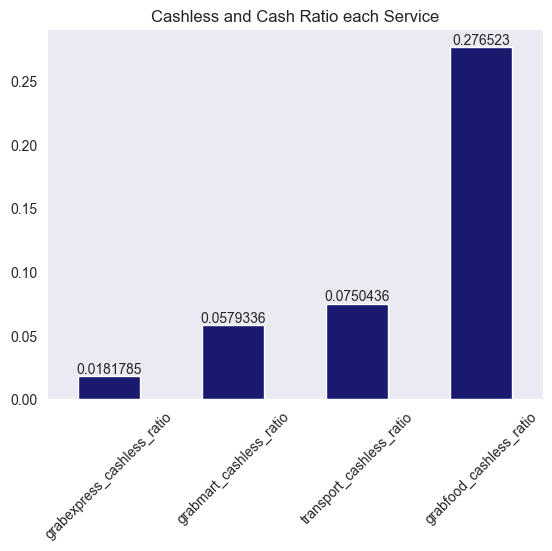

In [44]:
df_temp = df_m

df_temp['grabfood_cashless_ratio'] = df_m['grabfood_tpv'] / df_m['grabfood_gmv']
# df_temp['grabfood_cashless_ratio'].replace(np.inf, 0, inplace=True)

df_temp['grabmart_cashless_ratio'] = df_m['grabmart_tpv'] / df_m['grabmart_gmv']
# df_temp['grabmart_cashless_ratio'].replace(np.inf, 0, inplace=True)

df_temp['transport_cashless_ratio'] = df_m['transport_tpv'] / df_m['transport_gmv']
# df_temp['transport_cashless_ratio'].replace(np.inf, 0, inplace=True)

df_temp['grabexpress_cashless_ratio'] = df_m['grabexpress_tpv'] / df_m['grabexpress_gmv']
# df_temp['grabexpress_cashless_ratio'].replace(np.inf, 0, inplace=True)

df_temp = df_temp[['grabfood_cashless_ratio', 'grabmart_cashless_ratio', 'transport_cashless_ratio', 'grabexpress_cashless_ratio']].fillna(0)
ax = df_temp.mean().sort_values().plot(kind='bar', color='midnightblue')
plt.xticks(rotation=45)
plt.title('Cashless and Cash Ratio each Service')
# df_temp.loc[df_temp['grabfood_promo_ratio'] == np.inf]

ax.bar_label(ax.containers[0])

In [45]:
df_m['booking'].sum()

116859

In [46]:
df_m['cashless_bookings'].sum()

52010

In [47]:
x = df_m.loc[df_m['grabfood_tpv'] == 0].shape[0]
y = df_m.shape[0] - x
all = df_m.shape[0]

print(
    'Grabfood', '\n'
    'cash: ', x, '(', round((x/all)*100, 2), '%' ,')' , '\n',
    'cashless: ', y, '(', round((y/all)*100, 2), '%' ,')' , '\n',
    'all: ', all, '(', round((all/all)*100, 2), '%' ,')' , '\n'
)

Grabfood 
cash:  10803 ( 67.78 % ) 
 cashless:  5135 ( 32.22 % ) 
 all:  15938 ( 100.0 % ) 



In [48]:
x = df_m.loc[df_m['grabmart_tpv'] == 0].shape[0]
y = df_m.shape[0] - x
all = df_m.shape[0]

print(
    'Grabmart', '\n'
    'cash: ', x, '(', round((x/all)*100, 2), '%' ,')' , '\n',
    'cashless: ', y, '(', round((y/all)*100, 2), '%' ,')' , '\n',
    'all: ', all, '(', round((all/all)*100, 2), '%' ,')' , '\n'
)

Grabmart 
cash:  14959 ( 93.86 % ) 
 cashless:  979 ( 6.14 % ) 
 all:  15938 ( 100.0 % ) 



In [49]:
x = df_m.loc[df_m['transport_tpv'] == 0].shape[0]
y = df_m.shape[0] - x
all = df_m.shape[0]

print(
    'Transport', '\n'
    'cash: ', x, '(', round((x/all)*100, 2), '%' ,')' , '\n',
    'cashless: ', y, '(', round((y/all)*100, 2), '%' ,')' , '\n',
    'all: ', all, '(', round((all/all)*100, 2), '%' ,')' , '\n'
)

Transport 
cash:  14609 ( 91.66 % ) 
 cashless:  1329 ( 8.34 % ) 
 all:  15938 ( 100.0 % ) 



In [50]:
x = df_m.loc[df_m['grabexpress_tpv'] == 0].shape[0]
y = df_m.shape[0] - x
all = df_m.shape[0]

print(
    'Grabexpress', '\n'
    'cash: ', x, '(', round((x/all)*100, 2), '%' ,')' , '\n',
    'cashless: ', y, '(', round((y/all)*100, 2), '%' ,')' , '\n',
    'all: ', all, '(', round((all/all)*100, 2), '%' ,')' , '\n'
)

Grabexpress 
cash:  15616 ( 97.98 % ) 
 cashless:  322 ( 2.02 % ) 
 all:  15938 ( 100.0 % ) 



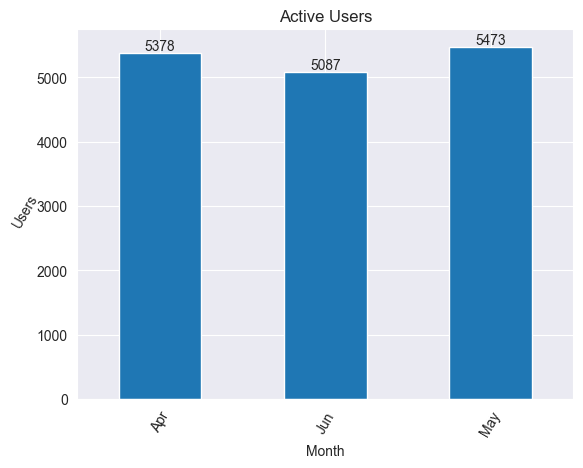

In [51]:
ax = df_m.groupby('month')['passenger_id'].nunique().plot(kind='bar')

ax.bar_label(ax.containers[0])

plt.xlabel('Month')
plt.ylabel('Users', rotation=60)
plt.xticks(rotation=60)
plt.title('Active Users')
plt.grid(True)

#### Result of aggregating data from 2 tables

(array([0, 1, 2, 3]),
 [Text(0, 0, 'platinum'),
  Text(1, 0, 'gold'),
  Text(2, 0, 'silver'),
  Text(3, 0, 'member')])

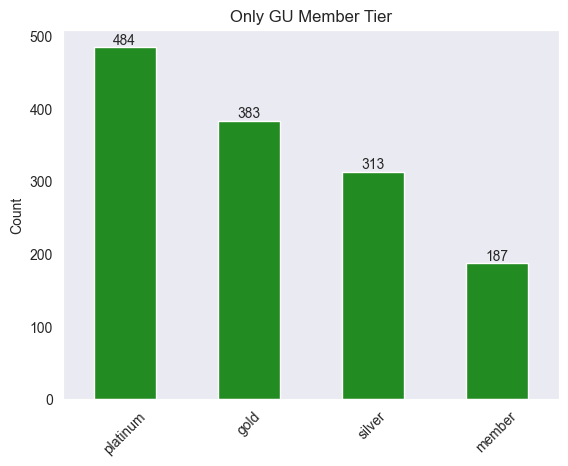

In [52]:
# Number of active customer who has Unlimited Subscription
gu_customer_condition = active_customer['GU subscription month'].notnull()
active_gu_customer = active_customer[gu_customer_condition]
active_gu_customer_id = np.array(active_gu_customer['passenger_id'])
ax = df_m[df_m['passenger_id'].isin(active_gu_customer_id)]['eom_reward_tier'].value_counts().plot(kind='bar', color='forestgreen')

ax.bar_label(ax.containers[0])
plt.title('Only GU Member Tier')
plt.ylabel('Count')
plt.xticks(rotation=45)

---

### Insights Summary

### Interpretation and Actions for Business use cases